In [26]:
import pandas as pd

In [27]:
data = pd.read_csv('gender.csv')
data.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,Unnamed: 9
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,NaN
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,NaN
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,NaN
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,NaN
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,NaN


In [28]:
data.shape

(131, 10)

In [29]:
data.isnull().sum()

 Gender               0
 Age                  0
 Height (cm)          0
 Weight (kg)          0
 Occupation           0
 Education Level      0
 Marital Status       0
 Income (USD)         0
 Favorite Color       0
Unnamed: 9          131
dtype: int64

In [30]:
data.drop(columns='Unnamed: 9',inplace=True)
data.head(2)

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green


In [31]:
data.columns = data.columns.str.strip()

In [32]:
data.columns

Index(['Gender', 'Age', 'Height (cm)', 'Weight (kg)', 'Occupation',
       'Education Level', 'Marital Status', 'Income (USD)', 'Favorite Color'],
      dtype='object')

In [33]:
data['AgeGroup'] = data['Age'].apply(lambda x : 0 if x <= 30 else 1)
data.head(10)

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color,AgeGroup
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue,1
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green,0
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple,1
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red,1
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow,0
5,male,45,190,92,Business Consultant,Master's Degree,Divorced,110000,Black,1
6,female,27,163,55,Marketing Specialist,Bachelor's Degree,Single,50000,Pink,0
7,male,52,179,83,CEO,Doctorate Degree,Married,500000,Blue,1
8,female,31,168,61,Project Manager,Bachelor's Degree,Married,80000,Green,1
9,male,36,177,76,Engineer,Master's Degree,Married,95000,Orange,1


In [34]:
data.shape, data['AgeGroup'].value_counts()

((131, 10),
 1    90
 0    41
 Name: AgeGroup, dtype: int64)

In [35]:
from sklearn.model_selection import train_test_split

X = data[['Age']]
y = data['AgeGroup']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42)
X_train, X_test, y_train, y_test

(     Age
 24    47
 67    38
 113   36
 89    28
 15    37
 ..   ...
 71    39
 106   27
 14    33
 92    36
 102   37
 
 [98 rows x 1 columns],
      Age
 55    30
 40    45
 19    44
 31    38
 115   41
 56    36
 69    40
 105   32
 81    27
 26    42
 95    34
 27    26
 64    27
 4     29
 97    29
 100   43
 36    41
 80    37
 93    30
 84    39
 18    33
 10    24
 122   29
 11    44
 127   38
 45    26
 70    33
 78    30
 47    29
 0     32
 12    28
 42    39
 51    35,
 24     1
 67     1
 113    1
 89     0
 15     1
       ..
 71     1
 106    0
 14     1
 92     1
 102    1
 Name: AgeGroup, Length: 98, dtype: int64,
 55     0
 40     1
 19     1
 31     1
 115    1
 56     1
 69     1
 105    1
 81     0
 26     1
 95     1
 27     0
 64     0
 4      0
 97     0
 100    1
 36     1
 80     1
 93     0
 84     1
 18     1
 10     0
 122    0
 11     1
 127    1
 45     0
 70     1
 78     0
 47     0
 0      1
 12     0
 42     1
 51     1
 Name: AgeGroup, dtype: int64)

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


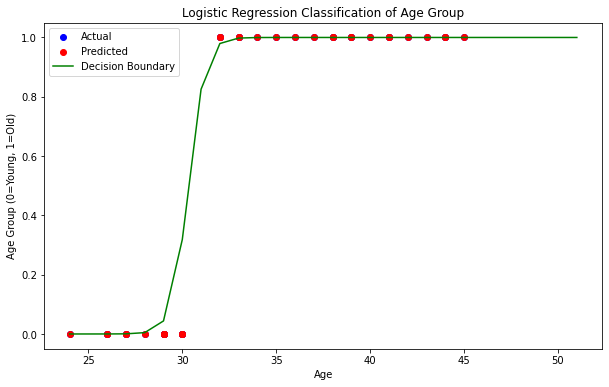

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')


X_values = np.arange(X['Age'].min(), X['Age'].max()).reshape(-1,1)
y_values = model.predict_proba(X_values)[:,1]
plt.plot(X_values, y_values, color='green', label='Decision Boundary')

plt.title('Logistic Regression Classification of Age Group')
plt.xlabel('Age')
plt.ylabel('Age Group (0=Young, 1=Old)')
plt.legend()
plt.show()


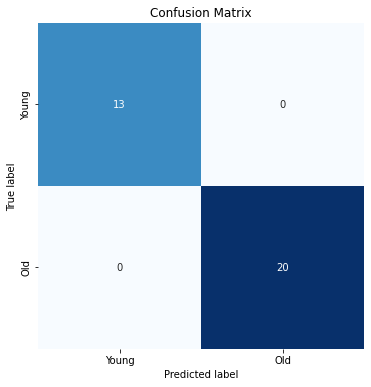

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', square=True, cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0.5, 1.5], ['Young', 'Old'])
plt.yticks([0.5, 1.5], ['Young', 'Old'], verticalalignment='center')

plt.show()
